In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Load breast cancer data and hot encodes categorical variable
WBCD = pd.read_csv("WisconsinBreastCancerDatabase.csv")
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [3]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [4]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))
cutoff = 0.5
yPredictedProb = logisticModel.predict_proba(X)[:, 1]
yPredLowCutoff = []
for i in range(0, yPredictedProb.size):
    if yPredictedProb[i] < cutoff:
        yPredLowCutoff.append(0)
    else:
        yPredLowCutoff.append(1)

In [5]:
# Display confusion matrix
metrics.confusion_matrix(y, yPredLowCutoff)

array([[333,  24],
       [ 45, 167]])

In [6]:
# Display accuracy
metrics.accuracy_score(y, yPredLowCutoff)

0.8787346221441125

In [7]:
# Display precision
metrics.precision_score(y, yPredLowCutoff)

0.8743455497382199

In [8]:
# Display recall
metrics.recall_score(y, yPredLowCutoff)

0.7877358490566038

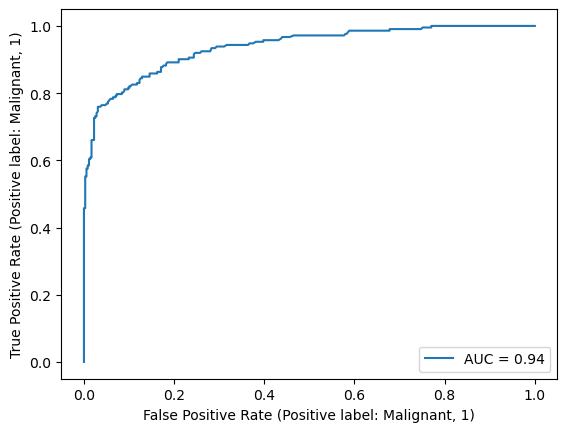

In [9]:
# Plot the ROC curve
pred = logisticModel.predict_proba(X)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, pos_label='Malignant, 1'
)
display.plot()
plt.show()